In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install fast_ml
from fast_ml import eda



In [248]:
data = pd.read_csv("/animal_disease_dataset.csv")


In [249]:
#find the unique diseases
data['Disease'].unique()


array(['pneumonia', 'lumpy virus', 'blackleg', 'foot and mouth',
       'anthrax'], dtype=object)

In [250]:
len(data['Disease'].unique())

5

In [251]:
data.head()
data = data.drop('Temperature', axis=1)


In [252]:
for col in data.columns:
  data[col].replace({'-':np.nan},inplace = True)
  print(data)

        Animal  Age                Symptom 1         Symptom 2  \
0          cow    3               depression    painless lumps   
1      buffalo   13           painless lumps  loss of appetite   
2        sheep    1               depression    painless lumps   
3          cow   14         loss of appetite  swelling in limb   
4        sheep    2           painless lumps  loss of appetite   
...        ...  ...                      ...               ...   
43773     goat    9       swelling in muscle          lameness   
43774  buffalo    3         loss of appetite    sores on mouth   
43775  buffalo   15  swelling in extremities            chills   
43776      cow    9          crackling sound          lameness   
43777  buffalo    4       difficulty walking     sores on gums   

                 Symptom 3         Disease  
0         loss of appetite       pneumonia  
1               depression     lumpy virus  
2         loss of appetite     lumpy virus  
3          crackling sound 

In [253]:
missing_data = data.isnull().sum()
missing_percentage = (missing_data[missing_data>0] / data.shape[0]) * 100
print(missing_percentage)

Series([], dtype: float64)


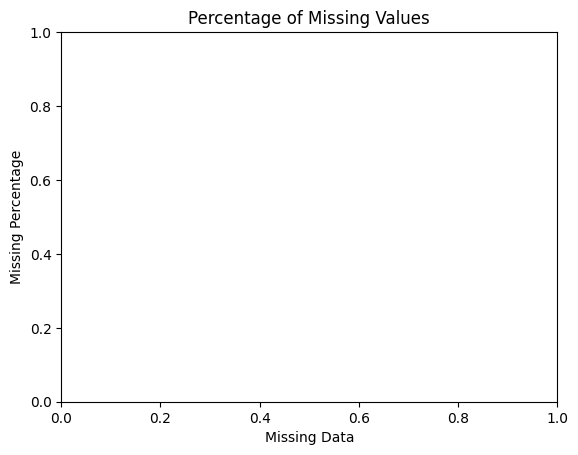

In [254]:
sns.barplot(x=missing_percentage.index, y=missing_percentage)

plt.xlabel('Missing Data')
plt.ylabel('Missing Percentage')
plt.title('Percentage of Missing Values')
plt.show()

In [255]:
X = data[['Animal','Symptom 1','Symptom 2','Symptom 3']]
y = data['Disease']

In [256]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
categorical_features = ['Animal','Symptom 1','Symptom 2','Symptom 3']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')

# Apply fit_transform directly on the DataFrame 'X'
X = ct.fit_transform(X) # Remove np.array() as X is already a DataFrame

In [257]:
# label_encoder = preprocessing.LabelEncoder()

# # Encode labels in the 'Country' column
# df['Animal'] = label_encoder.fit_transform(df['Country'])

In [258]:
#print the values in the X
nm = X.toarray()
print(nm)



[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [259]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [260]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [261]:
# sc = StandardScaler(with_mean=False)
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [262]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [263]:
# prompt: classifier oredict

y_pred = classifier.predict(X_test)
y_pred
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Confusion Matrix:', cm)

Accuracy: 0.8352672453174965
Precision: 0.8354883786537449
Recall: 0.8352672453174965
F1 Score: 0.8287116461781908
Confusion Matrix: [[2458    0    0    0    0]
 [   0 2445    0    0    0]
 [   0    0 2453    0    0]
 [   0    0    0  546 1257]
 [   0    0    0  546 1240]]


In [264]:
def cattle_disease_info(disease):
    # Dictionary containing precise descriptions, medications, and remedies for each disease
    disease_data = {
        'pneumonia': {
            'description': 'Pneumonia or Bovine Respiratory Disease (BRD) is a common respiratory infection in cattle, caused by bacteria, viruses, or environmental stress factors. Symptoms include difficulty breathing, coughing, and nasal discharge.',
            'remedies': [
                'Antibiotics such as oxytetracycline or florfenicol to treat bacterial infections.',
                'Anti-inflammatory drugs like flunixin meglumine to reduce lung inflammation.',
                'Proper ventilation, clean housing, and reduced overcrowding to minimize environmental stress.',
                'Vaccination against respiratory viruses such as Infectious Bovine Rhinotracheitis (IBR) and Bovine Respiratory Syncytial Virus (BRSV).'
            ]
        },
        'lumpy virus': {
            'description': 'Lumpy Skin Disease (LSD) is a viral disease caused by the Lumpy Skin Disease Virus (LSDV), leading to nodules on the skin, fever, and reduced milk production.',
            'remedies': [
                'Vaccination with live attenuated LSD vaccines to prevent the disease.',
                'Antibiotics such as oxytetracycline to treat secondary bacterial infections.',
                'Non-steroidal anti-inflammatory drugs (NSAIDs) to manage pain and inflammation.',
                'Isolate infected animals to prevent the spread of the virus.'
            ]
        },
        'blackleg': {
            'description': 'Blackleg is a fatal bacterial disease caused by *Clostridium chauvoei*, primarily affecting young cattle. It leads to sudden death, with symptoms including lameness, fever, and muscle swelling.',
            'remedies': [
                'Vaccination with a multivalent clostridial vaccine to prevent blackleg.',
                'Immediate treatment with high doses of penicillin in early stages (though treatment is often ineffective after symptoms appear).',
                'Proper disposal of carcasses to prevent the spread of spores in the environment.',
                'Regular vaccination of cattle in endemic areas to prevent outbreaks.'
            ]
        },
        'foot and mouth': {
            'description': 'Foot and Mouth Disease (FMD) is a highly contagious viral disease affecting cloven-hoofed animals, causing blisters in the mouth and feet, leading to lameness and decreased productivity.',
            'remedies': [
                'There is no specific treatment for FMD. Supportive care includes isolation of infected animals and rest.',
                'Vaccination is used to prevent outbreaks in FMD-free countries or regions.',
                'Disinfection of premises and equipment with sodium hydroxide or citric acid to control viral spread.',
                'Provide soft feed and anti-inflammatory drugs like flunixin meglumine to reduce pain and fever.'
            ]
        },
        'anthrax': {
            'description': 'Anthrax is a zoonotic bacterial disease caused by *Bacillus anthracis*, often resulting in sudden death in cattle without visible symptoms. It is highly fatal and transmissible.',
            'remedies': [
                'Vaccination in endemic areas using the Sterne vaccine to prevent outbreaks.',
                'Immediate treatment with antibiotics such as penicillin or tetracycline if diagnosed early.',
                'Strict quarantine and disinfection measures to prevent the spread.',
                'Do not open or move carcasses suspected of anthrax to prevent spore release; instead, burn or bury the carcass deeply with lime.'
            ]
        }
    }

    # Convert disease name to lowercase for case-insensitive search
    disease = disease.lower()

    # Check if the disease is in the dictionary
    if disease in disease_data:
        return {
            'disease': disease.capitalize(),
            'description': disease_data[disease]['description'],
            'remedies': disease_data[disease]['remedies']
        }
    else:
        return {"error": "Disease information not found. Please check the disease name."}

# Example usage



In [301]:
def predictAnimalDisease(input_data):
    from scipy.sparse import csr_matrix
    print(input_data)
    input_df = pd.DataFrame(input_data, columns = categorical_features)

    # Apply the ColumnTransformer to the DataFrame
    transformed_data = ct.transform(input_df)

    # Convert the transformed data to CSR format (if not already in that format)
    if not isinstance(transformed_data, csr_matrix):
        transformed_data = csr_matrix(transformed_data)

    y_pred_svm = classifier.predict(transformed_data)

    #print(cattle_disease_info(y_pred_svm[0]))
    return cattle_disease_info(y_pred_svm[0])


predictAnimalDisease([["cow","depression","painless lumps","loss of appetite"]])


[['cow', 'depression', 'painless lumps', 'loss of appetite']]


{'disease': 'Pneumonia',
 'description': 'Pneumonia or Bovine Respiratory Disease (BRD) is a common respiratory infection in cattle, caused by bacteria, viruses, or environmental stress factors. Symptoms include difficulty breathing, coughing, and nasal discharge.',
 'remedies': ['Antibiotics such as oxytetracycline or florfenicol to treat bacterial infections.',
  'Anti-inflammatory drugs like flunixin meglumine to reduce lung inflammation.',
  'Proper ventilation, clean housing, and reduced overcrowding to minimize environmental stress.',
  'Vaccination against respiratory viruses such as Infectious Bovine Rhinotracheitis (IBR) and Bovine Respiratory Syncytial Virus (BRSV).']}

In [266]:
!pip install modelbit


In [267]:
import modelbit
mb = modelbit.login()

In [302]:
mb.deploy(predictAnimalDisease)

In [303]:
input_data = [["cow", "depression", "painless lumps", "loss of appetite"]]

In [304]:
modelbit.get_inference(
  region="ap-south-1",
  workspace="pugazhmukilan",
  deployment="predictAnimalDisease",
  data=[[1, input_data]]
)

{'data': [[1,
   {'disease': 'Pneumonia',
    'description': 'Pneumonia or Bovine Respiratory Disease (BRD) is a common respiratory infection in cattle, caused by bacteria, viruses, or environmental stress factors. Symptoms include difficulty breathing, coughing, and nasal discharge.',
    'remedies': ['Antibiotics such as oxytetracycline or florfenicol to treat bacterial infections.',
     'Anti-inflammatory drugs like flunixin meglumine to reduce lung inflammation.',
     'Proper ventilation, clean housing, and reduced overcrowding to minimize environmental stress.',
     'Vaccination against respiratory viruses such as Infectious Bovine Rhinotracheitis (IBR) and Bovine Respiratory Syncytial Virus (BRSV).']}]]}